In [47]:
import random
import DeferredAcceptance as da
#from DeferredAcceptance import Person
from collections import deque
import heapq as hq

from sympy.stats import DiscreteMarkovChain, TransitionMatrixOf, P, E
from sympy import Matrix ,MatrixSymbol, Eq, symbols
import sympy as sp
import numpy as np
import copy

In [41]:
def LieGenerator(base_preferences_raw, deletion_list):
    base_preferences = copy.deepcopy(base_preferences_raw)
    output = []
    counter = 0
    for person in base_preferences:
        if deletion_list[counter] > 0:
            del base_preferences[counter][deletion_list[counter]]
        counter = counter + 1
    return     base_preferences
        
    
def OutcomesGenerator(base_m_pref,base_w_pref, starting_lies):
    print(str(starting_lies) + ":")
    print(da.GSDA(  LieGenerator(base_m_pref,starting_lies)
                  , LieGenerator(base_w_pref,starting_lies),1))
    print("M0 (0,1,2)")
    specific_lies = np.logical_or(starting_lies , [1,0,0,0])*1
    # note that the *1 turns the bool list to integers
    print(str(specific_lies))
    print(da.GSDA(  LieGenerator(base_m_pref,specific_lies)
                  , LieGenerator(base_w_pref,[0,0,0,0]),1))
    print("M1 (1,0,2)")
    specific_lies = np.logical_or(starting_lies , [0,1,0,0])*1
    print(da.GSDA(  LieGenerator(base_m_pref,specific_lies)
                  , LieGenerator(base_w_pref,[0,0,0,0]),1))
    print("W0 (1,0,2)")
    specific_lies = np.logical_or(starting_lies , [1,0,0,0])*1
    print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
                  , LieGenerator(base_w_pref,specific_lies),1))
    print("W1 (0,1,2)")
    specific_lies = np.logical_or(starting_lies , [0,1,0,0])*1
    print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,specific_lies),1))
    
OutcomesGenerator(base_m_pref,base_w_pref, [0,0,0,0])

[0, 0, 0, 0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[1 0 0 0]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
W1 (0,1,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]


In [42]:
OutcomesGenerator(base_m_pref,base_w_pref, [0,0,0,0])
OutcomesGenerator(base_m_pref,base_w_pref, [0,0,0,1])
OutcomesGenerator(base_m_pref,base_w_pref, [0,0,1,0])
OutcomesGenerator(base_m_pref,base_w_pref, [0,0,1,1])
OutcomesGenerator(base_m_pref,base_w_pref, [0,1,0,0])
OutcomesGenerator(base_m_pref,base_w_pref, [0,1,0,1])
OutcomesGenerator(base_m_pref,base_w_pref, [0,1,1,0])
OutcomesGenerator(base_m_pref,base_w_pref, [0,1,1,1])
OutcomesGenerator(base_m_pref,base_w_pref, [1,0,0,0])
OutcomesGenerator(base_m_pref,base_w_pref, [1,0,0,1])
OutcomesGenerator(base_m_pref,base_w_pref, [1,0,1,0])
OutcomesGenerator(base_m_pref,base_w_pref, [1,0,1,1])
OutcomesGenerator(base_m_pref,base_w_pref, [1,1,0,0])
OutcomesGenerator(base_m_pref,base_w_pref, [1,1,0,1])
OutcomesGenerator(base_m_pref,base_w_pref, [1,1,1,0])
OutcomesGenerator(base_m_pref,base_w_pref, [1,1,1,1])

[0, 0, 0, 0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[1 0 0 0]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
W1 (0,1,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[0, 0, 0, 1]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[1 0 0 1]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
W1 (0,1,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[0, 0, 1, 0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[1 0 1 0]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
W1 (0,1,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[0, 0, 1, 1]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[1 0 1 1]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[

In [4]:
pre = da.generate_preferences_ordinal(2,0,2)
base_m_pref = [[(0, 0), (-1, 1), (-2,2), (-3,3)], [(0, 1), (-1, 0), (-2,2), (-3,3)], [(0, 0), (-1, 1), (-2,2), (-3,3)], [(0, 0), (-1, 1), (-2,2), (-3,3)]]

base_w_pref = [[(0, 1), (-1, 0), (-2,2), (-3,3)], [(0, 0), (-1, 1), (-2,2), (-3,3)], [(0, 0), (-1, 1), (-2,2), (-3,3)], [(0, 0), (-1, 1), (-2,2), (-3,3)]]

In [17]:
print("Man 0 (0,1,2) [0,0,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))


print("Man 0 (0,1,2) [0,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))

print("Man 0 (0,1,2) [0,0,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))


print("Man 0 (0,1,2) [0,0,1,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))

print("Man 0 (0,1,2) [0,1,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))

print("Man 0 (0,1,2) [0,1,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))


print("Man 0 (0,1,2) [0,1,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))


print("Man 0 (0,1,2) [0,1,1,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))


print("Man 1 (1,0,2) [0,0,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))


print("Man 1 (1,0,2) [0,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))

print("Man 1 (1,0,2) [0,0,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))


print("Man 1 (1,0,2) [0,0,1,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))

print("Man 1 (1,0,2) [1,0,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))

print("Man 1 (1,0,2) [1,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))


print("Man 1 (1,0,2) [1,0,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))


print("Man 1 (1,0,2) [1,0,1,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))



Man 0 (0,1,2) [0,0,0,0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
Man 0 (0,1,2) [0,0,1,0]:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [2]), (1, [1]), (2, [0]), (3, [3])]
Man 0 (0,1,2) [0,0,0,1]:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [1]), (1, [2]), (2, [0]), (3, [3])]
Man 0 (0,1,2) [0,0,1,1]:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [1]), (1, [2]), (2, [0]), (3, [3])]
Man 0 (0,1,2) [0,1,0,0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
Man 0 (0,1,2) [0,1,1,0]:
[(0, [2]), (1, [0]), (2, [1]), (3, [3])]
[(0, [2]), (1, [1]), (2, [0]), (3, [3])]
Man 0 (0,1,2) [0,1,0,1]:
[(0, [0]), (1, [2]), (2, [1]), (3, [3])]
[(0, [0]), (1, [2]), (2, [1]), (3, [3])]
Man 0 (0,1,2) [0,1,1,1]:
[(0, [2]), (1, [0]), (2, [1]), (3, [3])]
[(0, [2]), (1, [3]), (2, [0]), (3, [1])]
Man 1 [0,0,0,0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
Man 1 [0,0,1,0]:
[(0, [1]), (1, [0]), (2, [2]

In [10]:
print("Woman 0 [0,0,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))


print("Woman 0 [0,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))

print("Woman 0 [2nd lies]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))


print("Woman 0 1+2 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))

print("Woman 0 comp lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))

print("Woman 0 comp + 1 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))


print("Woman 0 comp + 2 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))


print("Woman 0 comp + 1,2 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))


print("Woman 1 All truthful:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))


print("Woman 1 2st choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))

print("Woman 1 1nd lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))


print("Woman 1 1+2 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))

print("Woman 1 comp lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1, WP=True))

print("Woman 1 comp + 2 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1, WP=True))


print("Woman 1 comp + 1 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1, WP=True))


print("Woman 1 comp + 1,2 choice lies:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1, WP=True))


Woman 0 All truthful:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
Woman 0 1st choice lies:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [2]), (1, [1]), (2, [0]), (3, [3])]
Woman 0 2nd lies:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [2]), (1, [0]), (2, [1]), (3, [3])]
Woman 0 1+2 choice lies:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [2]), (1, [0]), (2, [1]), (3, [3])]
Woman 0 comp lies:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
Woman 0 comp + 1 choice lies:
[(0, [1]), (1, [2]), (2, [0]), (3, [3])]
[(0, [2]), (1, [1]), (2, [0]), (3, [3])]
Woman 0 comp + 2 choice lies:
[(0, [0]), (1, [2]), (2, [1]), (3, [3])]
[(0, [0]), (1, [2]), (2, [1]), (3, [3])]
Woman 0 comp + 1,2 choice lies:
[(0, [1]), (1, [2]), (2, [0]), (3, [3])]
[(0, [2]), (1, [3]), (2, [0]), (3, [1])]
Woman 1 All truthful:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
Woman 1 2st choice lies:
[(0, [1]), (1,

In [18]:
print("[0,0,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))

print("[0,1,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))

print("[0,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print("[0,0,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("[1,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))

print("[0,1,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("[0,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))

print("[0,0,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[0,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))



print("[1,1,0,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))


print("[1,0,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))


print("[1,0,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,0,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))



print("[1,1,1,0]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,0,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))


print("[1,1,0,1]:")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M0 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("M1 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))
print("W0 (1,0,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[1,1,0,0]),1))
print("W1 (0,1,2)")
print(da.GSDA(  LieGenerator(base_m_pref,[1,1,0,0])
              , LieGenerator(base_w_pref,[0,1,0,0]),1))


[0,0,0,0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
W1 (0,1,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
[1,0,0,0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [2]), (1, [1]), (2, [0]), (3, [3])]
W1 (0,1,2)
[(0, [1]), (1, [2]), (2, [0]), (3, [3])]
[0,1,0,0]:
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M0 (0,1,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
M1 (1,0,2)
[(0, [0]), (1, [1]), (2, [2]), (3, [3])]
W0 (1,0,2)
[(0, [2]), (1, [0]), (2, [1]), (3, [3])]
W1 (0,1,2)
[(0, [0]), (1, [2]), (2, [1]), (3, [3])]
[0,0,1,0]:
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
M0 (0,1,2)
[(0, [2]), (1, [1]), (2, [0]), (3, [3])]
M1 (1,0,2)
[(0, [2]), (1, [0]), (2, [1]), (3, [3])]
W0 (1,0,2)
[(0, [1]), (1, [0]), (2, [2]), (3, [3])]
W1 (0,1,2)
[

In [15]:
#All Truthful
#                  2nd choice            1st choice
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice            1st choice
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->1


[(0, [0]), (1, [1]), (2, [2])]
[(0, [1]), (1, [0]), (2, [2])]


In [ ]:
#2nd choice lies
#                  2nd choice(lie)            1st choice
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice(lie)            1st choice
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->3

In [ ]:
# 1st choice lies
#                  2nd choice            1st choice(lie)
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice            1st choice(lie)
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->1

In [ ]:
# compatriot lies
#                  1st choice            2nd choice
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)                Lie
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  1st choice            2nd choice
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)                Lie
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#1->1

In [ ]:
# 2nd choice and compatriot lies
#                  2nd choice(lie)            1st choice
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)                Lie
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice(lie)            1st choice
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)                Lie
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->2

In [ ]:
#1st choice and compatriot lies
#                  2nd choice            1st choice(lie)
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)                Lie
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice            1st choice(lie)
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)                Lie
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->1

In [ ]:
# 1st and 2nd choice lies
#                  2nd choice(lie)            1st choice(lie)
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice(lie)            1st choice(lie)
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->3

In [ ]:
# 1st and 2nd choice and compatriot lies
#                  2nd choice(lie)            1st choice(lie)
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (truth)                Lie
w_pref = [[(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 2), (-2,1)], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))

#                  2nd choice(lie)            1st choice(lie)
m_pref = [[(0, 0), (-1, 2)        ], [(0, 1), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)                Lie
w_pref = [[(0, 1), (-1, 2)        ], [(0, 0), (-1, 2)        ], [(0, 0), (-1, 1), (-2,2)]]
print(da.GSDA(m_pref, w_pref,1))
#2->3

In [ ]:
#                  1st choice            2nd choice
m_pref = [[(0, 0), (-1, 1), (-2,2)], [(0, 1), (-1, 0), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
#              ME (lie)
w_pref = [[(0, 1), (-1, 2), (-2,0)], [(0, 0), (-1, 1), (-2,2)], [(0, 0), (-1, 1), (-2,2)]]
da.GSDA(m_pref, w_pref,1)

In [ ]:
da.GSDA(m_pref, w_pref,1)

In [43]:

ep = symbols("epsilon")
T = Matrix([[(1-ep)**4, 2*(1-ep)**3*ep+   4*(1-ep)**2*ep**2+   4*(1-ep)**3*ep**1+   ep**4, 2*(1-ep)**2*ep**2, 2*(1-ep)**3*ep],
            [(1-ep)**4, 2*(1-ep)**3*ep+   4*(1-ep)**2*ep**2+   4*(1-ep)**3*ep**1+   ep**4, 2*(1-ep)**2*ep**2, 2*(1-ep)**3*ep],
            [(1-ep)**4, 2*(1-ep)**3*ep+   4*(1-ep)**2*ep**2+   4*(1-ep)**3*ep**1+   ep**4, 2*(1-ep)**2*ep**2, 2*(1-ep)**3*ep],
            [(1-ep)**4/((1-ep)**4+ 3*(1-ep)**3*ep + 3*(1-ep)**2*ep**2+(1-ep)**3*ep),
             ((1-ep)**3*ep+2*(1-ep)**2*ep**2+(1-ep)**3*ep**1)/((1-ep)**4+ 3*(1-ep)**3*ep + 3*(1-ep)**2*ep**2+(1-ep)**3*ep),
             (1-ep)**2*ep**2/((1-ep)**4+ 3*(1-ep)**3*ep + 3*(1-ep)**2*ep**2+(1-ep)**3*ep),
             2*(1-ep)**3*ep/((1-ep)**4+ 3*(1-ep)**3*ep + 3*(1-ep)**2*ep**2+(1-ep)**3*ep)]])
Y = DiscreteMarkovChain("Y", [1,2,3,4], T)
YS = DiscreteMarkovChain("Y")

In [54]:
Y.stationary_distribution()


Matrix([[(14*epsilon**5 - 17*epsilon**4 + 8*epsilon**3 - 10*epsilon**2 + 6*epsilon - 1)/(4*epsilon**5 - 10*epsilon**4 + 6*epsilon**3 - 2*epsilon - 1), (2*epsilon**6 - 16*epsilon**5 + 17*epsilon**4 - 10*epsilon**3 + 10*epsilon**2 - 6*epsilon)/(4*epsilon**5 - 10*epsilon**4 + 6*epsilon**3 - 2*epsilon - 1), (-2*epsilon**6 + 2*epsilon**5 + 2*epsilon**3 - 2*epsilon**2)/(4*epsilon**5 - 10*epsilon**4 + 6*epsilon**3 - 2*epsilon - 1), (4*epsilon**5 - 10*epsilon**4 + 6*epsilon**3 + 2*epsilon**2 - 2*epsilon)/(4*epsilon**5 - 10*epsilon**4 + 6*epsilon**3 - 2*epsilon - 1)]])

In [56]:
Y.transition_probabilities

Matrix([
[                                                                                (1 - epsilon)**4,                                                                      epsilon**4 + 4*epsilon**2*(1 - epsilon)**2 + 6*epsilon*(1 - epsilon)**3,                                                                               2*epsilon**2*(1 - epsilon)**2,                                                                                 2*epsilon*(1 - epsilon)**3],
[                                                                                (1 - epsilon)**4,                                                                      epsilon**4 + 4*epsilon**2*(1 - epsilon)**2 + 6*epsilon*(1 - epsilon)**3,                                                                               2*epsilon**2*(1 - epsilon)**2,                                                                                 2*epsilon*(1 - epsilon)**3],
[                                                                        

In [60]:
print(sp.latex(Y.stationary_distribution()))

\left[\begin{matrix}\frac{14 \epsilon^{5} - 17 \epsilon^{4} + 8 \epsilon^{3} - 10 \epsilon^{2} + 6 \epsilon - 1}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} & \frac{2 \epsilon^{6} - 16 \epsilon^{5} + 17 \epsilon^{4} - 10 \epsilon^{3} + 10 \epsilon^{2} - 6 \epsilon}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} & \frac{- 2 \epsilon^{6} + 2 \epsilon^{5} + 2 \epsilon^{3} - 2 \epsilon^{2}}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} & \frac{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} + 2 \epsilon^{2} - 2 \epsilon}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1}\end{matrix}\right]


In [61]:
print(sp.latex(Y.transition_probabilities))

\left[\begin{matrix}\left(1 - \epsilon\right)^{4} & \epsilon^{4} + 4 \epsilon^{2} \left(1 - \epsilon\right)^{2} + 6 \epsilon \left(1 - \epsilon\right)^{3} & 2 \epsilon^{2} \left(1 - \epsilon\right)^{2} & 2 \epsilon \left(1 - \epsilon\right)^{3}\\\left(1 - \epsilon\right)^{4} & \epsilon^{4} + 4 \epsilon^{2} \left(1 - \epsilon\right)^{2} + 6 \epsilon \left(1 - \epsilon\right)^{3} & 2 \epsilon^{2} \left(1 - \epsilon\right)^{2} & 2 \epsilon \left(1 - \epsilon\right)^{3}\\\left(1 - \epsilon\right)^{4} & \epsilon^{4} + 4 \epsilon^{2} \left(1 - \epsilon\right)^{2} + 6 \epsilon \left(1 - \epsilon\right)^{3} & 2 \epsilon^{2} \left(1 - \epsilon\right)^{2} & 2 \epsilon \left(1 - \epsilon\right)^{3}\\\frac{\left(1 - \epsilon\right)^{4}}{3 \epsilon^{2} \left(1 - \epsilon\right)^{2} + 4 \epsilon \left(1 - \epsilon\right)^{3} + \left(1 - \epsilon\right)^{4}} & \frac{2 \epsilon^{2} \left(1 - \epsilon\right)^{2} + 2 \epsilon \left(1 - \epsilon\right)^{3}}{3 \epsilon^{2} \left(1 - \epsilon\right)^{2} + 

In [96]:
# Find percent of time process spends in each step
step_length = [[1,2,2,1]]
#size(step_length)
avg_stp_length =  Y.stationary_distribution().dot(step_length)

print("avg step length:")
print(sp.latex(avg_stp_length))

frac_st_C = 2*Y.stationary_distribution()[2]/avg_stp_length

print("type C frac")
print(sp.latex(frac_st_C))
frac_st_C.subs(ep,.5)

frac_multi_stable = frac_st_C*(1-ep)
print("frac_multi_stable:")
print(sp.latex(frac_multi_stable))

avg step length:
\frac{2 \left(- 2 \epsilon^{6} + 2 \epsilon^{5} + 2 \epsilon^{3} - 2 \epsilon^{2}\right)}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} + \frac{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} + 2 \epsilon^{2} - 2 \epsilon}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} + \frac{14 \epsilon^{5} - 17 \epsilon^{4} + 8 \epsilon^{3} - 10 \epsilon^{2} + 6 \epsilon - 1}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} + \frac{2 \left(2 \epsilon^{6} - 16 \epsilon^{5} + 17 \epsilon^{4} - 10 \epsilon^{3} + 10 \epsilon^{2} - 6 \epsilon\right)}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1}
type C frac
\frac{2 \left(- 2 \epsilon^{6} + 2 \epsilon^{5} + 2 \epsilon^{3} - 2 \epsilon^{2}\right)}{\left(\frac{2 \left(- 2 \epsilon^{6} + 2 \epsilon^{5} + 2 \epsilon^{3} - 2 \epsilon^{2}\right)}{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \epsilon^{3} - 2 \epsilon - 1} + \frac{4 \epsilon^{5} - 10 \epsilon^{4} + 6 \e

<IPython.core.display.Javascript object>


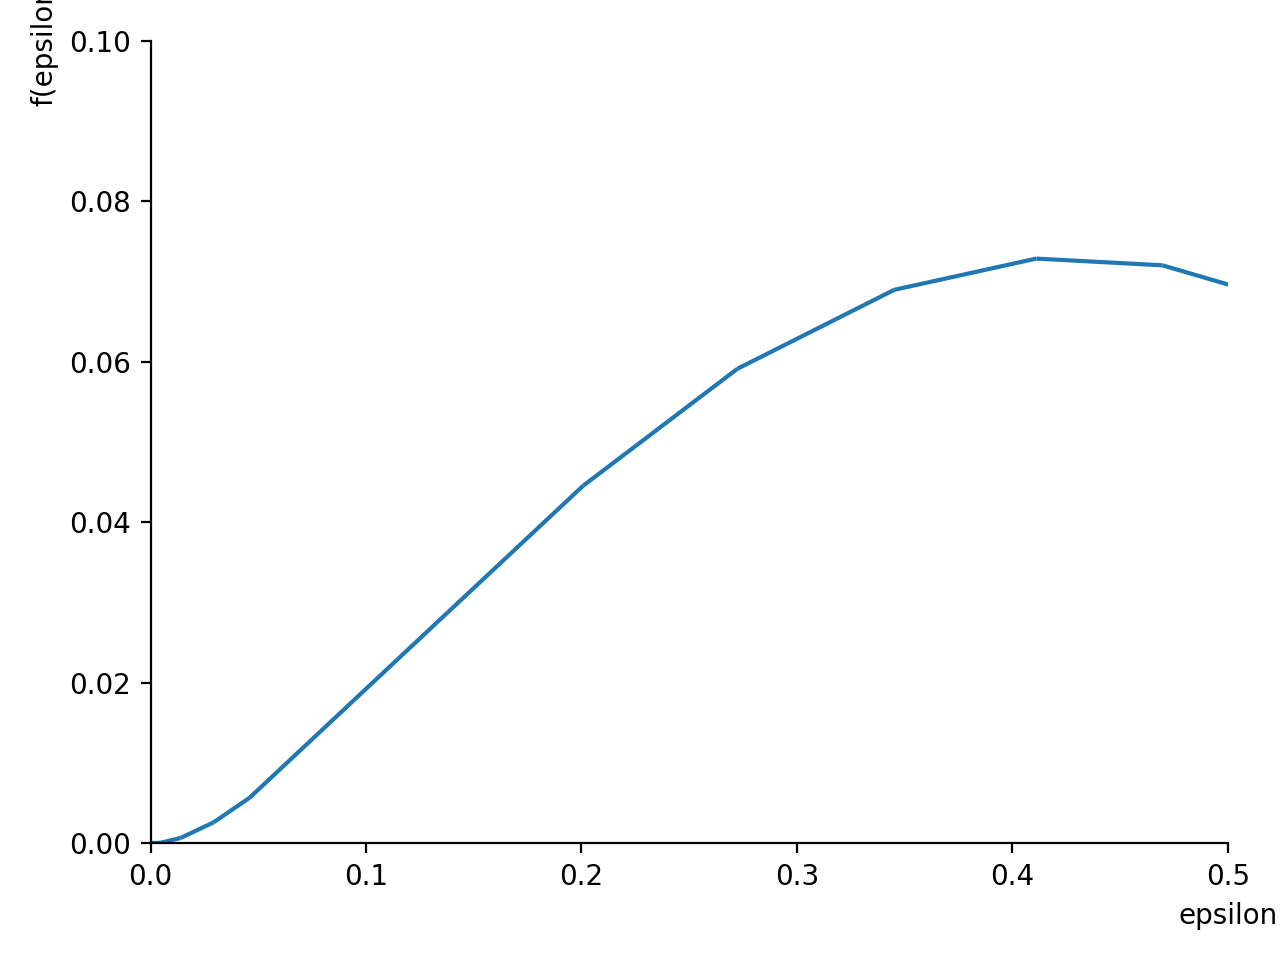

In [101]:
p1 = sp.plot(frac_multi_stable, xlim = (0,.5), ylim = (0,.1))

In [ ]:
print(Y.stationary_distribution().subs(ep,.1))
Y.transition_probabilities.subs(ep,.5)
print('av step = ' + 
      str(1+ Y.stationary_distribution().subs(ep,.5)[1] +
         Y.stationary_distribution().subs(ep,.5)[2]))

In [ ]:
Y.transition_probabilities
TS = MatrixSymbol('T',3,3)
P(Eq(YS[3],2), Eq(YS[1],1) & TransitionMatrixOf(YS,TS))
P(Eq(Y[3],3),Eq(Y[1],1)).round(2)

In [ ]:

def generate_preferences(n, sigma):
  sigma = sigma * n / 2
  m_pref = [sorted([(random.gauss(j, sigma), j) for j in range(n)]) for i in range(n)]
  w_pref = [sorted([(random.gauss(j, sigma), j) for j in range(n)]) for i in range(n)]

  return (m_pref, w_pref)

(m_pref, w_pref) = generate_preferences(50, 0)

couples_when_men_propose = GSDA(m_pref, w_pref, 2)
couples_when_men_propose

In [ ]:
bob = [5,31,2,3,4]
hq.heapify(bob)
print(hq.heappushpop(bob, 2.5))
bob